### Stereo-seq dataset to study the restoration of axolotl brain function upon injury:

#### Conditions:
1. Adult (N=1)
2. 30 day-post injury (30DPI) (N=1)
3. 30 day-post injury (60DPI) (N=1)


The Stereo-seq axolotl data from Wei et al. is available in the Spatial Transcript Omics DataBase (STOmics DB):
https://db.cngb.org/stomics/artista/.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import scanpy as sc
import graphcompass as gc

## Load data

In [4]:
adata = gc.datasets.stereoseq_axolotl_subset()

In [5]:
adata.obs.head()

,CellID,Batch,cell_id,Annotation,condition
CELL.11,CELL.11,Injury_30DPI_rep2_FP200000264BL_A6,11,VLMC,Injury 30DPI
CELL.12,CELL.12,Injury_30DPI_rep2_FP200000264BL_A6,12,VLMC,Injury 30DPI
CELL.13,CELL.13,Injury_30DPI_rep2_FP200000264BL_A6,13,VLMC,Injury 30DPI
CELL.15,CELL.15,Injury_30DPI_rep2_FP200000264BL_A6,15,VLMC,Injury 30DPI
CELL.16,CELL.16,Injury_30DPI_rep2_FP200000264BL_A6,16,VLMC,Injury 30DPI


## Compute distances between cell-type specific subgraphs using portrait method to compare conditions

In [6]:
# define library_key and cluster_key for computing spatial graphs using `squidpy.gr.spatial_neighbors`

library_key="Batch"
cluster_key="Annotation"

In [7]:
# compute pairwise similarities between cell-type specific graphs across samples
### results are stored in adata.uns["pairwise_similarities"]

gc.tl.distance.compare_conditions(
    adata=adata,
    library_key=library_key,
    cluster_key=cluster_key,
    method="portrait",
    kwargs_spatial_neighbors={
        'coord_type': 'generic',
        'delaunay': True,  
    }  
)

Computing spatial graphs...


  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

Computing graph similarities...


100%|██████████| 19/19 [00:56<00:00,  2.97s/it]

Done!


In [8]:
adata

AnnData object with n_obs × n_vars = 28459 × 18611
    obs: 'CellID', 'Batch', 'cell_id', 'Annotation', 'condition'
    uns: 'spatial_neighbors', 'Annotation_Batch_nhood_enrichment', 'pairwise_similarities'
    obsm: 'spatial'
    layers: 'counts'
    obsp: 'spatial_connectivities', 'spatial_distances'

## Plot results

In [11]:
# define necessary params
condition_key="condition" # key in adata.obs where conditions are stored
control_group="Injury 60DPI" # reference group

19it [00:00, 128.04it/s]


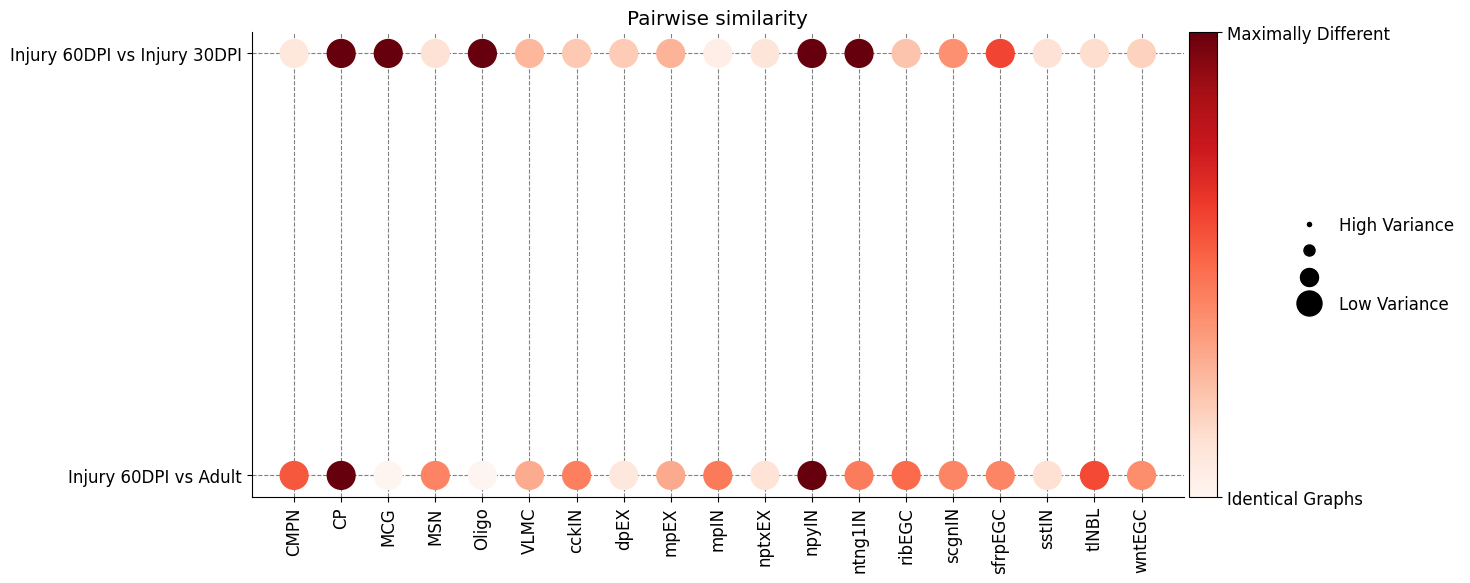

In [14]:
gc.pl.distance.compare_conditions(
    adata=adata,
    library_key=library_key,
    condition_key=condition_key,
    control_group=control_group,
    # add_ncells_and_density_plots=True,
    palette="Reds",
    dpi=100,
    figsize=(15,6),
#     save="figures/stereoseq_portrait.pdf"
)